In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the urnings algortihm
import main_urnings as mu

In [115]:
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 100000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings1")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [116]:
adaptive_sim.play(n_games=n_sim, test = True)

In [117]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_nochange.csv", urnings_matrix, delimiter=",")

[[0.5 0.6 0.6 ... 0.8 0.7 0.6]
 [0.5 0.5 0.6 ... 0.6 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.6 0.6 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.1 0.2 0.1]
 [0.5 0.5 0.5 ... 0.4 0.5 0.5]]


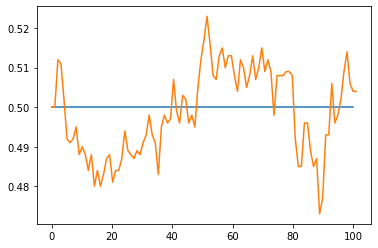

In [120]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [5, 95])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(np.repeat(0.5, len(col_means)))
plt.plot(x,col_means)
#plt.fill_between(x, col_upper, col_lower)


In [153]:
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 100000
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 100000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings1")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

In [154]:
growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value
    for pl in players:
        pl.true_value += 0.0005
        

In [155]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_change.csv", urnings_matrix, delimiter=",")

[[0.5 0.5 0.4 ... 0.6 0.6 0.6]
 [0.5 0.4 0.5 ... 0.5 0.4 0.4]
 [0.5 0.4 0.5 ... 0.5 0.5 0.6]
 ...
 [0.5 0.5 0.4 ... 0.6 0.6 0.6]
 [0.5 0.5 0.6 ... 0.6 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


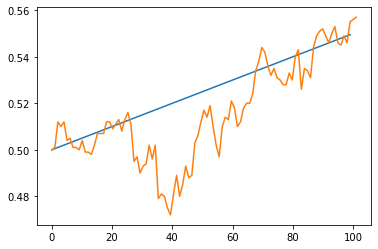

In [156]:
col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
#plt.fill_between(x, col_upper, col_lower)

In [172]:
#np.random.seed(12312312)
#game settings
n_player = 100
n_items = 100000
starting_score = 6
player_urn_sizes = 12
item_urn_sizes = 100000
n_sim = 100

#true scores for players and items
item_true_values = np.random.uniform(0.1, 0.9, n_items)

#creating players and items
players = []
for i in range(n_player):
    player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.5, so_score=10)
    players.append(player)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = np.round(item_true_values[i], 1) * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings1")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

growth = np.zeros(n_sim)
for i in range(n_sim):
    adaptive_sim.play(n_games=1, test = True)
    growth[i] = players[0].true_value

    if i % 40 == 0:
        for pl in players:
            pl.true_value += 0.025
        

[[0.5        0.5        0.5        ... 0.66666667 0.66666667 0.66666667]
 [0.5        0.5        0.5        ... 0.5        0.5        0.5       ]
 [0.5        0.58333333 0.5        ... 0.41666667 0.41666667 0.41666667]
 ...
 [0.5        0.5        0.5        ... 0.75       0.75       0.75      ]
 [0.5        0.5        0.41666667 ... 0.5        0.58333333 0.66666667]
 [0.5        0.5        0.5        ... 0.16666667 0.25       0.25      ]]


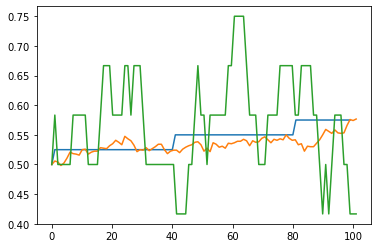

In [177]:
urnings_matrix = np.zeros((n_player, n_sim + 1))
for pl in range(n_player):
    row = players[pl].container
    urnings_matrix[pl,:] = row


print(urnings_matrix / player_urn_sizes)

np.savetxt("urnings_matrix_5_10_dischange.csv", urnings_matrix, delimiter=",")

col_means = np.mean(urnings_matrix, axis = 0) / player_urn_sizes
col_var = np.std(urnings_matrix, axis = 0) / np.sqrt(n_player)

col_lower = np.zeros(len(col_means))
col_upper = np.zeros(len(col_means))
for i in range(len(col_means)):
    confint = np.percentile(urnings_matrix[:,i] / player_urn_sizes, [10, 90])
    col_lower[i] = confint[0]
    col_upper[i] = confint[1]


x = np.linspace(0, 101, 101)

plt.plot(growth)
plt.plot(x,col_means)
plt.plot(x, urnings_matrix[2,:] / player_urn_sizes)
#plt.fill_between(x, col_upper, col_lower)

In [5]:
np.load("urnings_array_nochange.npy")

array([[[ 3.,  5.,  7.,  9., 25.,  3.,  5.,  7.,  9., 25.,  3.,  5.,
          7.,  9., 25.,  3.,  5.,  7.,  9., 25.,  3.,  5.,  7.,  9.,
         25.],
        [ 3.,  5.,  7.,  9., 25.,  3.,  5.,  7.,  9., 25.,  3.,  5.,
          7.,  9., 25.,  3.,  5.,  7.,  9., 25.,  3.,  5.,  7.,  9.,
         25.],
        [ 2.,  4.,  6.,  8., 24.,  3.,  5.,  7.,  9., 25.,  4.,  6.,
          8., 10., 26.,  4.,  6.,  8., 10., 26.,  4.,  6.,  8., 10.,
         26.],
        [ 2.,  4.,  6.,  8., 24.,  3.,  5.,  7.,  9., 25.,  3.,  5.,
          7.,  9., 25.,  5.,  7.,  9., 11., 27.,  5.,  7.,  9., 11.,
         27.],
        [ 2.,  4.,  6.,  8., 24.,  3.,  5.,  7.,  9., 25.,  3.,  5.,
          7.,  9., 25.,  5.,  7.,  9., 11., 27.,  5.,  7.,  9., 11.,
         27.],
        [ 1.,  3.,  5.,  7., 23.,  3.,  5.,  7.,  9., 25.,  3.,  5.,
          7.,  9., 25.,  5.,  7.,  9., 11., 27.,  5.,  7.,  9., 11.,
         27.],
        [ 1.,  3.,  5.,  7., 23.,  2.,  4.,  6.,  8., 24.,  3.,  5.,
          7.,